In [1]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_ads = pd.read_csv('../Data_Set/Advertising.csv')

In [3]:
df_ads.drop(columns=['Unnamed: 0'], inplace=True)
df_ads

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

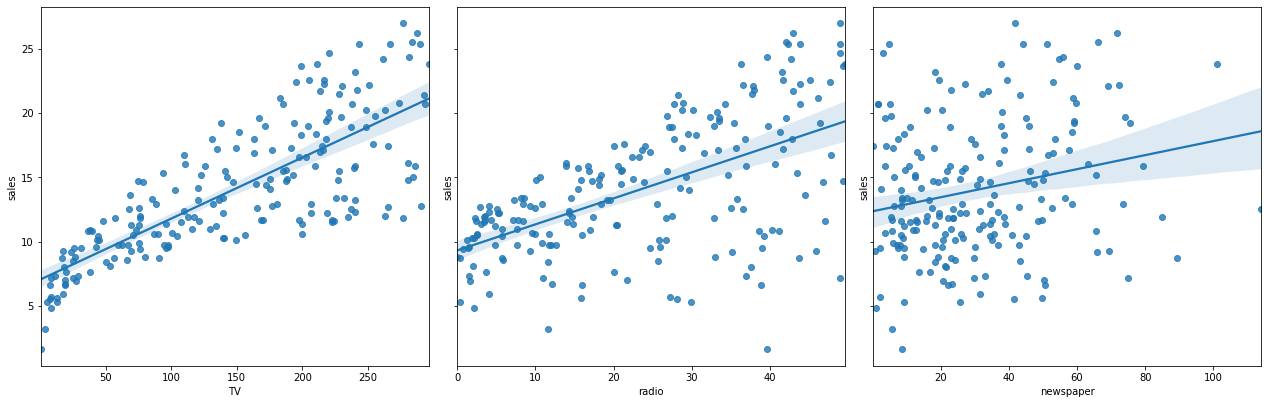

In [4]:
# plt.subplots(nrows=1, ncols=3, sharey=True, squeeze=False)
fig, axes = plt.subplots(1,3, sharey=True, squeeze=False, 
                         constrained_layout=True
                        )
fig.set_size_inches(17.5, 5.5)
a1, a2, a3 = axes[0]
sns.regplot(x='TV', y='sales', data=df_ads, ax=a1)
sns.regplot(x='radio', y='sales', data=df_ads, ax=a2)
sns.regplot(x='newspaper', y='sales', data=df_ads, ax=a3)

### Q: Why is the irreducible error larger than zero? 
A :The quantity ε may contain unmeasured variables that are useful in predicting Y : since we don’t measure them, f cannot use them for its prediction. The quantity ε may also contain unmeasurable variation. 

3 Main things to look in a case Statistical model is 
- predicted value is dependent on which features
- what is the relation between target/response to features (+ve/-ve/neutral)
- can the relation between target/response be explained by linear methods/equations

>**Inference**: Use the model to learn about the data generation process. 
>
>**Prediction**: Use the model to predict the outcomes for new data points.

![image](../Images/Interpretability_ML_Modles.png)

The lasso linear model uses an alternative fitting procedure for estimating the coefficients β0 , β1 , . . . , βp . (which are weights of the features on which target depends on). The new procedure is more restrictive in estimating the coefficients, and sets a number of them to exactly zero. Hence in this sense the lasso is a less flexible approach than linear regression.It is also more interpretable than linear regression, because in the final model the response variable will only be related to a small subset of the predictors—namely, those with nonzero coefficient estimates

> ### For unsupervised learning

For unsupervised learning usually visualized method of clustering the features is used, but this is not the best for a number of cases. For instance, if there are p variables in our data set, then p(p − 1)/2 distinct scatterplots can be made, and visual inspection is simply not a viable way to identify clusters. For this reason, automated clustering methods are important.


![Train Vs Test MSE](../Images/MSE_Train_vs_Test.png)

As fast the flexibility increase or decrease the TEST data MSE always follows a **U** trend and TestMSE is always the lowest at a point where there is hardly any underfitting and overfitting 

For a estimated model function $ \hat{f}$ and the test data $x_{0}$, test MSE, for a given value $x_{0}$, can always be decomposed into the sum of three fundamental quantities: the variance of $\hat{f}(x_{0})$, the squared bias of $\hat{f}(x_{0})$ and the variance of the error terms $\varepsilon$. 
  
  \begin{align*}
    E( y_{0} - \hat{f}(x_{0}))^2 = {\sf Var}(\hat{f}(x_{0})) + [Bias(\hat{f}(x_{0}))]^2 + {\sf Var}(\varepsilon).
 \end{align*}
 
 Here in the above equation 
 - LHS is Expected Test MSE
 - RHS is sum of Variance (inherently +ve) and square of Bias (+ve as squared term exists) and Variance of error is +ve always . So MSE can never be below Variance of Error term , tough we can try making Variance and Bias of Test predictions as Zero.

### Navigating the Bias-Variance Tradeoff

While the bias-variance tradeoff seems to imply that by reducing bias one has to increase variance or vice versa, such a tradeoff is not necessarily an equal exchange of bias and variance, meaning there could be ways to find an `optimal` amount of bias and variance, as depicted by the minimum of the mean squared error plot.

>Some concrete techniques for effectively navigating the bias-variance tradeoff to minimize mean squared error may be :-


- **Increasing the Amount of `Data`**
    
    High increase in amount of data reduces the variance of the Model and infinite data means zero bias. Need to figure how much increase in data
    

- **Regularization**

    Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. It helps reduce variance at the expense of adding a little bias into the model. The higher the `regularization parameter` is, the more a function is penalized for being too complex. This effectively reduces the size or complexity of a function class by penalizing functions that might overfit to data.
    

- **Model Ensembles**

    Model ensemble learning techniques, such as bagging, boosting, and stacking, combine multiple models to reduce the bias and/or variance of the individual models when making predictions. Bagging keeps the bias constant. It uses the concept of `parallel ensemble` which reduces variance with bias being constant through out and `sequenctial model` which builds on decreasing the model bias error though slight increase in variance is expected.

### Bayes Decision Theory

The entire purpose of the Bayes Decision Theory is to help us select decisions that will cost us the least `risk` using bayes classifer. Bayes classifer being a simple classifier that assigns each observation to the most likely class, given its predictor values.

The simplest risk is the classification error (i.e., assuming that misclassification costs are equal). When misclassification costs are not equal, the risk can include the cost associated with different misclassifications.



For our class $\omega_{1}$ and feature $x$, we have:  

   \begin{align*}
   P( \omega_{1} | x ) &= \frac{P(x | \omega_{1}) * P(\omega_{1})} {P(x)} \\
   {\tt or}\\
   Posterior &= \frac{Likelihood * Prior}{Evidence}
   \end{align*}

There are 4 terms in this formula that we need to understand:

- Prior – $P(\omega_{1})$ is the Prior Probability that $\omega_{1}$ is true before the data is observed. In other words its the knowledge of how likely we expect the certain state or result before we take a look on data.
- Posterior – $P(\omega_{1}|x)$ is the Posterior Probability that $\omega_{1}$ is true after the data is observed.
- Evidence – $P(x)$ is the Total Probability of the Data
- Likelihood – $P(x|\omega_{1})$ is the information about $\omega_{1}$ provided by $x$ i.e. the  class-conditional probability density function is the probability density function for x, our feature, given the nature of/info in $\omega_{1}$ 


As Bayes classfier tries to minimizes the risk by always choosing the class where the conditional probability (i.e. the class for $\omega_{1} = j$, given the observed predictor vector $x$ consisting of feature $x_{0}, x_{1}, ...x_{n} $) is the largest.

In general, the overall Bayes error rate is given by :
    \begin{align*}
    1 - E(max_{j}(P(\omega_{1} = j|x))
    \end{align*}
    
So.. under Bayes’ theorem, no theory is perfect. Rather, it is a work in progress, always subject to further refinement and testing as new data pours in, though the very decision rule of Bayes’ Classifier automatically minimizes the conditional risk associated with an action. Therefore, the Bayes classifier serves as an unattainable gold standard against which to compare other methods. But for real data, we do not know the conditional distribution of target($\omega_{1}$) given feature($x$), and so computing the Bayes classifier is considered nearly impossible and for this we can consider KNN

### KNN Approximation of Conditional Probability

As Naive Bayes is quite calculation intensive but the conditional probability can be estimated using KNN and there by an attempt to create Bayes decision boundary.
KNN is an non parametric and non linear supervised model, i.e. it doesn't need to be trained and it can be just run on the data, there is no concept of weight or parameters as that doesn't apply , so storing an KNN model doesn't make sense. *`But it is a great choice where there is conditional independence between feature and response and when there is no prior data about the underlying probability distributions of the data set`*.

Given a positive integer $K$ and a test observation $x_{0}$ , the KNN classifier first identifies the neighbors $K$ points in the training data that are closest to $x_{0}$, represented by $N_{0}$. It then estimates the conditional probability for class $j$ as the fraction of points in $N_{0}$ whose response values equal $j$, where $I(y_{i} = j)$ is an indicator variable :
    \begin{align*}
    P(Y = j|X = x_{0} ) = \frac{1}{K} \sum_{i \in N_{0}} I(y_{i} = j).
    \end{align*}
    
Finally, KNN classifies the test observation $x_{0}$ to the class with the largest probability from the above equation. And based on the above equation when an appropriate K value the decision boundary is drawn it approxiamtes very closely with Navie Bayes Decision boundary. Check the image below:

![Decision Boundary of NB in purple to KNN in black](../Images/Decision_Boundary_NB_KNN.png)


The choice of K has a drastic effect on the KNN classifier obtained. When K = 1, the decision boundary is overly
flexible and finds patterns in the data that don’t correspond to the Bayes decision boundary. As K grows, the method becomes less flexible and produces a decision boundary that is close to linear. This corresponds to a low-variance but high-bias classifier and close to 100 based on the data generated, it can show a higly linear and unflexible charactertics.

But as observed in the regression setting, the training error rate consistently declines as the flexibility increases. However, the test error exhibits a characteristic U-shape, declining at first (*`with a minimum at approximately best fit`*) before increasing again when the method becomes excessively flexible and overfits. This minimum can be iterated over logarithmically until a best fit (minimum test error) is reached. The base of **U** curve as shown above in Plot between MSE and flexibility

## Python Lab Ch2

In [7]:
column = ["mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin","name"]
df_auto = pd.read_fwf('../Data_Set/Auto.data', names=column)
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,mpg\tcylinders\tdisplacement\thorsepower weigh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0 8 307.0 130.0 3504. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.0 8 350.0 165.0 3693. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0 8 318.0 150.0 3436. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0 8 304.0 150.0 3433. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0 4 140.0 86.00 2790. 15...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,44.0 4 97.00 52.00 2130. 24...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,32.0 4 135.0 84.00 2295. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,28.0 4 120.0 79.00 2625. 18...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
